In [3]:
# from circuit_suite import circuits
# # from backend_suite import backends, large_backends, shuffle_test, routing_test
# #from backend_suite import placement_test

In [4]:
# from backend_suite import backends
# backends["Hatlab-Large-Riswap-Dense"].pass_manager.run(circuits["QFT"].circuit_lambda(4))

## Circuit Transpile Benchmark

In [9]:
#make a plot :)
import matplotlib.pyplot as plt

def benchmark(backends, circuit_generator, q_range=None, continuously_save=False, overwrite=False):
    #override qrange if provided
    if q_range is None:
        q_range = circuit_generator.q_range
    
    #check if data dicts are empty
    for backend in backends:
        if not circuit_generator.label in backend.data.keys():
            backend.data[circuit_generator.label] = {}
            backend.data[circuit_generator.label]["duration"] = {}
            backend.data[circuit_generator.label]["gate_count"] = {}
            backend.data[circuit_generator.label]["gate_count_crit"] = {}
            backend.data[circuit_generator.label]["layout_score"] = {}

    #outer loop over circuit since this may take long time to generate
    for q in q_range:
        #create new variable sized lambda circuit

        #wait to build circuit (may be costly), if we end up not needing it for any backend
        if overwrite:
            qc = circuit_generator.circuit_lambda(q)

        for backend in backends:
            
            #condition to skip
            if not overwrite:
                #convert to int because if loaded from json key will be a string
                if q in [int(k) for k in backend.data[circuit_generator.label]["duration"].keys()]:
                    continue

            #resolve wait
            if qc is None:
                qc = circuit_generator.circuit_lambda(q)

            #logging.info(f"Transpiler qc{q} for {backend.label}")
            print(f"Transpiler qc{q} for {backend.label}")
            backend.pass_manager.run(qc)

            #save data to dict
            duration = backend.pass_manager.property_set["duration_longest_path_length"]
            backend.data[circuit_generator.label]["duration"][q] = float(duration)
            
            gate_count = backend.pass_manager.property_set["count_ops"]
            backend.data[circuit_generator.label]["gate_count"][q] = gate_count

            #FIXME
            # gate_count_critical_path = backend.pass_manager.property_set["count_ops_longest_path"]
            # backend.data[circuit_generator.label]["gate_count_crit"][q] = gate_count_critical_path

            layout_score = backend.pass_manager.property_set["layout_score"]
            backend.data[circuit_generator.label]["layout_score"][q] = float(layout_score)

            #for long tests, may want to save more regularly in case exit early
            if continuously_save:
                backend.save_json()
                
    for backend in backends:
        #save dict to json
        backend.save_json()

In [12]:
#FIXME, use figure to handle subplots
def plot(backends, circuit_label, parameter="duration"):
    for backend in backends:
        if circuit_label in backend.data.keys():
            if "swap" not in parameter:
                x = backend.data[circuit_label][parameter].keys()
                x = [int(el) for el in list(x)]
                y = backend.data[circuit_label][parameter].values()
                x, y = zip(*sorted(zip(x, y)))
                plt.plot(x, y, '-o', label=backend.label)
            else:
                x = backend.data[circuit_label]["gate_count"].keys()
                x = [int(el) for el in list(x)]
                y = backend.data[circuit_label]["gate_count"].values()
                x, y = zip(*sorted(zip(x, y)))
                y = [el['swap'] for el in y]
                plt.plot(x, y, '-o', label=backend.label)

    plt.xlabel(circuit_label)
    plt.ylabel("circuit duration")
    plt.legend()

    #savefig
    filename = f"images/large_{circuit_label}_{parameter}"
    import os
    i = 0
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    plt.savefig('{}{:d}.png'.format(filename, i), facecolor='white')

#plot(placement_test, circuit_gen.label, parameter="duration")
#plot(routing_test, circuit_gen.label, parameter="layout_score")

In [7]:
# from circuit_suite import circuits
# circuit_gen = circuits["Randomized_QC"]
# from backend_suite import new_test
# #with critical path turned off
# benchmark(backends=new_test, circuit_generator=circuit_gen, continuously_save=True)
# #plot(placement_test, circuit_gen.label, parameter="duration")
# plot(new_test, circuit_gen.label, parameter="duration")

Important data- note that the hypercube inserts more swaps than hatlab (172 vs 119), therefore decomposes to more riswaps (1094 vs 935); however, in the critical path hypercube now has less riswaps than hatlab (402 vs 435). This means that more of the swaps that are happening the in the hypercube are parallizable? Suggests better placement and routing algorithms are still needed - problem is that they become very slow. Except, Hatlab has a better layout score? That must mean that BasicSwapPass is just really bad?

In [15]:
from backend_suite import ibm_backends
from circuit_suite import circuits
circuit_gen = circuits["QAOA_Vanilla"]
benchmark(backends=ibm_backends, circuit_generator=circuit_gen, continuously_save=True, overwrite=True)
#plot(placement_test, circuit_gen.label, parameter="duration")
plot(ibm_backends, circuit_gen.label, parameter="swap_count")

/home/evm9/transpilation_EM/venv/lib/python3.8/site-packages/qiskit/transpiler/passes/optimization/consolidate_blocks.py:55: UserWarning: Only know how to decompose properly for supercontrolled basis gate. This gate is ~Ud(0.3926990816987239, 0.3926990816987239, 0.0)
  self.decomposer = TwoQubitBasisDecomposer(kak_basis_gate)


KeyError: 'swap'

Transpiler qc8 for penguin_V1
Transpiler qc8 for penguin_V2
Transpiler qc8 for penguin_V3
Transpiler qc8 for penguin_V4
Transpiler qc16 for penguin_V1
Transpiler qc16 for penguin_V2
Transpiler qc16 for penguin_V3
Transpiler qc16 for penguin_V4
Transpiler qc24 for penguin_V1
Transpiler qc24 for penguin_V2
Transpiler qc24 for penguin_V3
Transpiler qc24 for penguin_V4
Transpiler qc32 for penguin_V1
Transpiler qc32 for penguin_V2
Transpiler qc32 for penguin_V3
Transpiler qc32 for penguin_V4
Transpiler qc48 for penguin_V1
Transpiler qc48 for penguin_V2
Transpiler qc48 for penguin_V3
Transpiler qc48 for penguin_V4
Transpiler qc64 for penguin_V1
Transpiler qc64 for penguin_V2
Transpiler qc64 for penguin_V3
Transpiler qc64 for penguin_V4
Transpiler qc80 for penguin_V1
Transpiler qc80 for penguin_V2
Transpiler qc80 for penguin_V3
Transpiler qc80 for penguin_V4


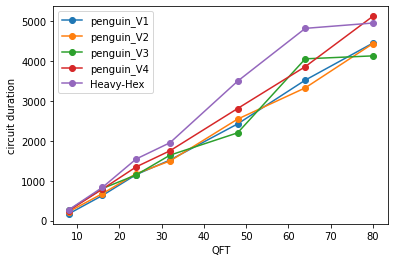

In [18]:
from backend_suite import ibm_backends
from circuit_suite import circuits
circuit_gen = circuits["QFT"]
benchmark(backends=ibm_backends, circuit_generator=circuit_gen, continuously_save=True)
#plot(placement_test, circuit_gen.label, parameter="duration")
plot(ibm_backends, circuit_gen.label, parameter="duration")

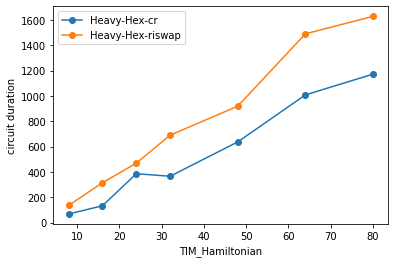

In [4]:
from backend_suite import ibm_backends, ibm_gate_backends
from circuit_suite import circuits
circuit_gen = circuits["TIM_Hamiltonian"]
benchmark(backends=ibm_gate_backends, circuit_generator=circuit_gen, continuously_save=True)
#plot(placement_test, circuit_gen.label, parameter="duration")
plot(ibm_gate_backends, circuit_gen.label, parameter="duration")

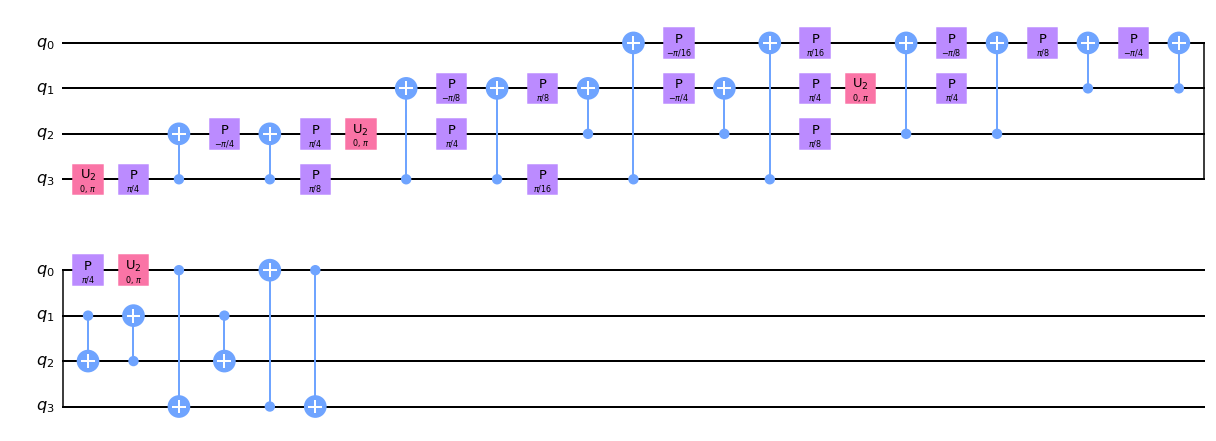

In [6]:
circuit_gen.circuit_lambda(4).decompose().decompose().draw(output='mpl')

In [10]:
from qiskit import QuantumCircuit
import sys
sys.path.append("..")
qc = circuit_gen.circuit_lambda(4)
from utils.transpiler_passes import level_0_pass_manager
from backend_utils.mock_backends import *
# pm = level_0_pass_manager(FakeHeavyHex("riswap"), "riswap", decompose_1q=False)
pm = level_0_pass_manager(FakeHeavyHex("rzx"), "CR", decompose_1q=False)
print(pm.property_set["depth"])
# transp = pm.run(qc)
# transp.draw(output='mpl')
# from qiskit.quantum_info import Operator
# Operator(transp).equiv(Operator(qc))

TypeError: 'NoneType' object is not subscriptable

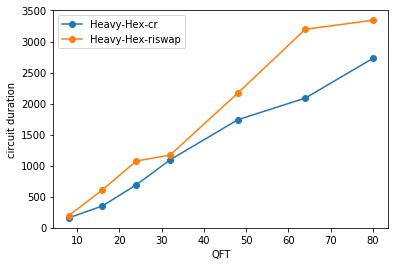

In [5]:
from backend_suite import ibm_backends, ibm_gate_backends
from circuit_suite import circuits
circuit_gen = circuits["QFT"]
benchmark(backends=ibm_gate_backends, circuit_generator=circuit_gen, continuously_save=True)
#plot(placement_test, circuit_gen.label, parameter="duration")
plot(ibm_gate_backends, circuit_gen.label, parameter="duration")

In [ ]:
#with critical path turned on
circuit_gen = circuits["TIM_Hamiltonian"]
benchmark(backends=[backends["Hypercube-Large-Riswap"], backends["Hatlab-Large-Riswap"]], circuit_generator=circuit_gen, q_range=[30])

In [ ]:
circuit_gen = circuits["QAOA_Vanilla"]
backends = shuffle_test
benchmark(backends=backends, circuit_generator=circuit_gen)

In [ ]:
circuit_gen = circuits["QFT"]
benchmark(backends=large_backends, circuit_generator=circuit_gen)

In [ ]:
circuit_gen = circuits["Randomized_QC"]
benchmark(backends=large_backends, circuit_generator=circuit_gen)

In [ ]:
circuit_gen = circuits["GHZ"]
benchmark(backends=large_backends, circuit_generator=circuit_gen)

In [ ]:
circuit_gen = circuits["VQE"]
benchmark(backends=large_backends, circuit_generator=circuit_gen, q_range=[8, 16, 32])